# Testing the `intepret` module

**Authorship:**
Adam Klie, *10/05/2022*
***
**Description:**
Notebook for testing out the `intepret` module.

In [1]:
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
%autoreload 2

import os
import torch
import numpy as np
import pandas as pd
import eugene as eu

Global seed set to 13


GPU is available: True
Number of GPUs: 1
Current GPU: 0
GPUs: Quadro RTX 5000


# Feature attribution

In [235]:
explains = eu.interpret.nn_explain(model, (x, x_rev), target=0, ref_type="shuffle", saliency_type="DeepLift")

In [236]:
explains = eu.interpret.nn_explain(model, (x, x_rev), target=0, ref_type="zero", saliency_type="GradientSHAP")

In [237]:
explains = eu.interpret.nn_explain(model, (x, x_rev), target=0, ref_type="shuffle", saliency_type="GradientSHAP")

In [238]:
explains = eu.interpret.nn_explain(model, (x, x_rev), target=0, ref_type="gc", saliency_type="GradientSHAP")

In [241]:
eu.interpret.feature_attribution_sdata(model, sdata, target=0)
#eu.interpret.feature_attribution(eugene, sdata, saliency_method="NaiveISM")
eu.interpret.feature_attribution_sdata(model, sdata, target=1, reference_type="gc", saliency_method="DeepLift")
eu.interpret.feature_attribution_sdata(model, sdata, target=1, reference_type="shuffle", saliency_method="GradientSHAP")

No transforms given, assuming just need to tensorize.


Computing saliency on batches of size 128:   0%|          | 0/7 [00:00<?, ?it/s]

No transforms given, assuming just need to tensorize.


Computing saliency on batches of size 128:   0%|          | 0/7 [00:00<?, ?it/s]

No transforms given, assuming just need to tensorize.


Computing saliency on batches of size 128:   0%|          | 0/7 [00:00<?, ?it/s]

In [245]:
import shap

In [251]:
x[0].shape

torch.Size([4, 66])

In [253]:
rn=np.random.choice(sdata.ohe_seqs.shape[0], 500, replace=False)

In [268]:
model(*(torch.tensor(sdata.ohe_seqs[rn]).float(), torch.tensor(sdata.ohe_rev_seqs[rn]).float()))

tensor([[-0.0863, -0.1243],
        [-0.0859, -0.1225],
        [-0.0796, -0.1198],
        [-0.0829, -0.1183],
        [-0.0902, -0.1211],
        [-0.0874, -0.1207],
        [-0.0904, -0.1213],
        [-0.0834, -0.1193],
        [-0.0861, -0.1172],
        [-0.0916, -0.1254],
        [-0.0854, -0.1256],
        [-0.0876, -0.1245],
        [-0.0860, -0.1217],
        [-0.0838, -0.1210],
        [-0.0905, -0.1219],
        [-0.0872, -0.1225],
        [-0.0858, -0.1264],
        [-0.0846, -0.1206],
        [-0.0833, -0.1243],
        [-0.0837, -0.1250],
        [-0.0857, -0.1194],
        [-0.0876, -0.1208],
        [-0.0822, -0.1215],
        [-0.0853, -0.1247],
        [-0.0918, -0.1208],
        [-0.0802, -0.1231],
        [-0.0851, -0.1234],
        [-0.0836, -0.1179],
        [-0.0844, -0.1172],
        [-0.0896, -0.1339],
        [-0.0807, -0.1219],
        [-0.0849, -0.1251],
        [-0.0908, -0.1260],
        [-0.0849, -0.1203],
        [-0.0782, -0.1189],
        [-0.0844, -0

In [290]:
explainer = shap.DeepExplainer(model, [x, x_rev])

In [291]:
shap_values, indexes = explainer.shap_values([x, x_rev])

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
Using non-full backward hooks on a Module that does not return a single Tensor or a tuple of Tensors is deprecated and will be removed in future versions. This hook will be missing some of the grad_output. Please use register_full_backward_hook to get the documented behavior.
Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool1d in a future release.


In [292]:
shap_values

array([[[-1.74931040e-14,  3.31201470e-14,  3.76816329e-14, ...,
         -4.02863196e-04,  5.42432826e-05, -5.57458407e-05],
        [ 3.43919009e-15,  3.12095862e-14,  6.12488982e-14, ...,
          8.92341122e-05,  1.97865920e-05,  2.04870630e-05],
        [-2.93781731e-15, -1.18175381e-13, -5.87193461e-14, ...,
          9.56197910e-05,  3.55838929e-05,  8.37760017e-05],
        [ 2.47436162e-14,  5.54933195e-14,  1.13752893e-13, ...,
         -3.08431445e-05, -3.96842843e-05, -3.81094505e-05]],

       [[-4.32161250e-15,  7.06729648e-15, -1.58084741e-13, ...,
          4.28808380e-05,  1.79533999e-05, -3.37442470e-05],
        [ 3.90953732e-15,  2.20080539e-14,  1.79750166e-14, ...,
          1.37334660e-04, -1.49069510e-05,  8.62936577e-05],
        [ 8.42222224e-15, -8.28414892e-14,  2.73198924e-14, ...,
          4.20268043e-05, -3.98679476e-05, -1.42444367e-06],
        [-7.82612365e-14,  3.37817746e-14,  1.12575924e-13, ...,
          3.98531061e-04,  4.78343354e-05, -6.05588

In [ ]:
explainer.

In [242]:
sdata

SeqData object with = 1000 seqs
seqs = (1000,)
names = (1000,)
rev_seqs = None
ohe_seqs = (1000, 4, 66)
ohe_rev_seqs = (1000, 4, 66)
seqs_annot: 'target', 'train_val', 'target_2'
pos_annot: PyRanges object with 1400 features
seqsm: None
uns: 'InputXGradient_forward_imps', 'InputXGradient_reverse_imps', 'DeepLift_forward_imps', 'DeepLift_reverse_imps', 'GradientSHAP_forward_imps', 'GradientSHAP_reverse_imps'

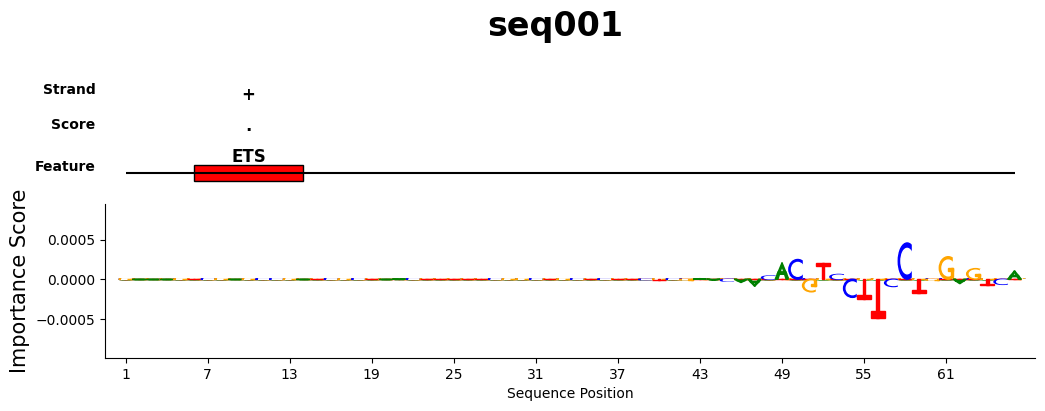

In [243]:
eu.pl.seq_track(sdata, seq_id="seq001", uns_key="DeepLift_reverse_imps")

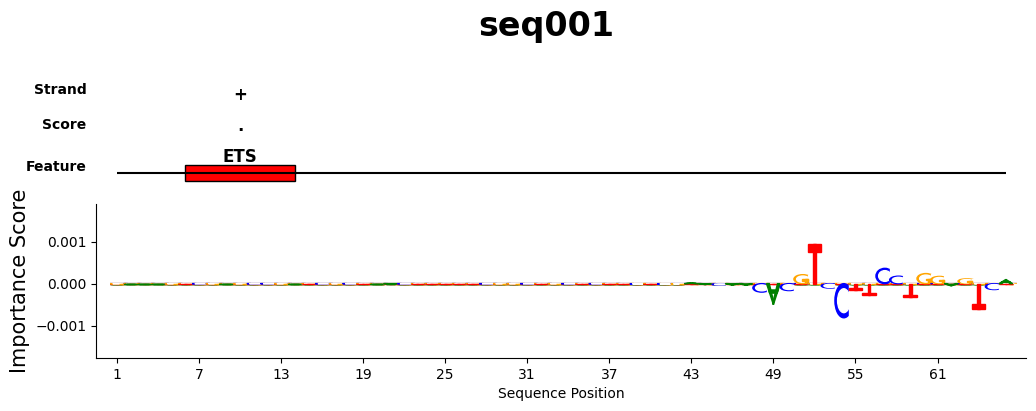

In [244]:
eu.pl.seq_track(sdata, seq_id="seq001", uns_key="InputXGradient_reverse_imps")

In [28]:
eu.interpret.pca(sdata, uns_key="InputXGradient_imps")

Make sure your matrix is sample by feature


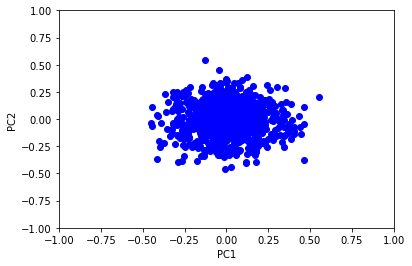

In [29]:
eu.pl.pca(sdata, seqsm_key="InputXGradient_imps_pca")

In [30]:
eu.interpret.umap(sdata, uns_key="InputXGradient_imps")

Make sure your matrix is sample by feature


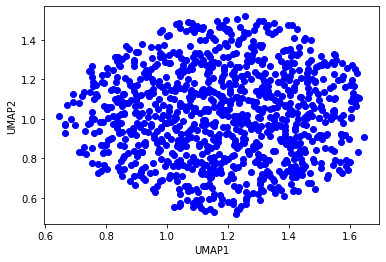

In [31]:
eu.pl.umap(sdata, seqsm_key="InputXGradient_imps_umap")

In [36]:
sdata.uns["InputXGradient_imps_pca"]

PCA(n_components=30)

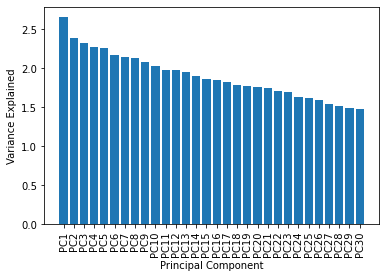

In [41]:
eu.pl.skree(sdata, uns_key="InputXGradient_imps_pca")

In [75]:
eu.interpret.aggregate_importance(sdata, uns_key="InputXGradient_imps")

In [77]:
sdata.pos_annot

,Chromosome,Start,End,Name,Score,Strand,InputXGradient_imps_agg_scores
0,seq000,27,34,ETS,.,+,6.907533e-07
1,seq000,47,54,GATA,.,-,2.522031e-03
2,seq000,48,55,ETS,.,-,2.087915e-03
3,seq001,6,13,ETS,.,+,1.701949e-11
4,seq002,5,12,ETS,.,+,-9.114633e-12
...,...,...,...,...,...,...,...
1395,seq994,20,27,ETS,.,-,3.931711e-09
1396,seq995,8,15,ETS,.,+,-2.968943e-11
1397,seq996,54,61,ETS,.,-,-3.709709e-03
1398,seq997,35,42,ETS,.,+,2.780085e-05


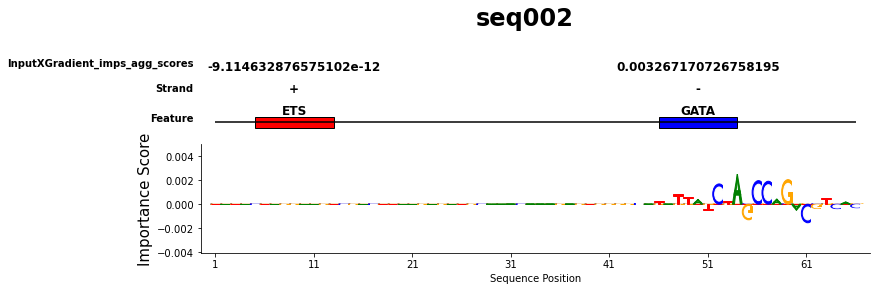

In [82]:
eu.pl.seq(sdata, seq_id="seq002", uns_key="InputXGradient_imps", additional_annotations=["Strand", "InputXGradient_imps_agg_scores"])

In [43]:
p_annot = sdata.pos_annot.df[sdata.pos_annot.df["Chromosome"] == "seq000"]

In [44]:
p_annot

,Chromosome,Start,End,Name,Score,Strand
0,seq000,27,34,ETS,.,+
1,seq000,47,54,GATA,.,-
2,seq000,48,55,ETS,.,-


In [47]:
vals = sdata.uns["InputXGradient_imps"]

In [48]:
vals.shape

(1000, 4, 66)

In [64]:
df

,Chromosome,Start,End,Name,Score,Strand
0,seq000,27,34,ETS,.,+
1,seq000,47,54,GATA,.,-
2,seq000,48,55,ETS,.,-
3,seq001,6,13,ETS,.,+
4,seq002,5,12,ETS,.,+
...,...,...,...,...,...,...
1395,seq994,20,27,ETS,.,-
1396,seq995,8,15,ETS,.,+
1397,seq996,54,61,ETS,.,-
1398,seq997,35,42,ETS,.,+


In [67]:
vals = sdata.uns["InputXGradient_imps"]
df = sdata.pos_annot.df
agg_scores = []
for i, row in df.iterrows():
    seq_id = row["Chromosome"]
    start = row["Start"]
    end = row["End"]
    seq_idx = np.where(sdata.names == seq_id)[0][0]
    agg_scores.append(vals[seq_idx, :, start:end].sum())
df["agg_scores"] = agg_scores
pr.PyRanges(df)

In [71]:
import pyranges as pr

,Chromosome,Start,End,Name,Score,Strand,agg_scores
0,seq000,27,34,ETS,.,+,6.907533e-07
1,seq000,47,54,GATA,.,-,2.522031e-03
2,seq000,48,55,ETS,.,-,2.087915e-03
3,seq001,6,13,ETS,.,+,1.701949e-11
4,seq002,5,12,ETS,.,+,-9.114633e-12
...,...,...,...,...,...,...,...
1395,seq994,20,27,ETS,.,-,3.931711e-09
1396,seq995,8,15,ETS,.,+,-2.968943e-11
1397,seq996,54,61,ETS,.,-,-3.709709e-03
1398,seq997,35,42,ETS,.,+,2.780085e-05


In [56]:
ranges = sdata.pos_annot

In [58]:
ranges["agg"] = "test"

TypeError: 'PyRanges' object does not support item assignment

In [59]:
ranges.df

,Chromosome,Start,End,Name,Score,Strand
0,seq000,27,34,ETS,.,+
1,seq000,47,54,GATA,.,-
2,seq000,48,55,ETS,.,-
3,seq001,6,13,ETS,.,+
4,seq002,5,12,ETS,.,+
...,...,...,...,...,...,...
1395,seq994,20,27,ETS,.,-
1396,seq995,8,15,ETS,.,+
1397,seq996,54,61,ETS,.,-
1398,seq997,35,42,ETS,.,+


# Filter Visualization

# *In Silico* Experimentation

# Data E-T-L

In [3]:
sdata = eu.datasets.random1000()
eu.pp.prepare_seqs_sdata(sdata)
sdata

  0%|          | 0/3 [00:00<?, ?it/s]

One-hot encoding sequences:   0%|          | 0/1000 [00:00<?, ?it/s]

SeqData object modified:
	ohe_seqs: None -> 1000 ohe_seqs added
	ohe_rev_seqs: None -> 1000 ohe_rev_seqs added
    seqs_annot:
        + train_val


SeqData object with = 1000 seqs
seqs = (1000,)
names = (1000,)
rev_seqs = None
ohe_seqs = (1000, 4, 66)
ohe_rev_seqs = (1000, 4, 66)
seqs_annot: 'target', 'train_val'
pos_annot: PyRanges object with 1400 features
seqsm: None
uns: None

# Model I&I

In [4]:
model = eu.models.DeepBind(input_len=66, output_dim=1)
eu.models.init_weights(model)

# Test API

In [5]:
# Set-up of some sequences to test
seq_num = np.random.choice(32, size=1, replace=False).squeeze()
seqs = sdata.seqs[:32]
seq = seqs[seq_num]
ohe_seqs = sdata.ohe_seqs[:32]
ohe_seq = ohe_seqs[seq_num]
seq, ohe_seq.shape, ohe_seqs.shape

('TCATTAGATTGGGTTGCTGTTTAGCAGGACCATATCCGGAGGCTTTAATGTTACCCGGCAGTGCTT',
 (4, 66),
 (32, 4, 66))

## Test `in_silico_best_k_muts`

In [9]:
mut_ohe_seq, delta, delta_ind = eu.interpret.best_k_muts(model, ohe_seq, k=1)
mut_seq = eu.pp.decode_seq(mut_ohe_seq.squeeze(axis=0))
seq[delta_ind.squeeze()], mut_seq[delta_ind.squeeze()], seq, mut_seq, eu.pp._utils._hamming_distance(seq, mut_seq)

[[ 2 61]] [61] [0.00944884]
(4, 66)


('T',
 'G',
 'TCATTAGATTGGGTTGCTGTTTAGCAGGACCATATCCGGAGGCTTTAATGTTACCCGGCAGTGCTT',
 'TCATTAGATTGGGTTGCTGTTTAGCAGGACCATATCCGGAGGCTTTAATGTTACCCGGCAGGGCTT',
 1)

## Test `in_silico_best_mut_seqs`

In [10]:
mut_ohe_seqs, deltas, delta_inds = eu.interpret.best_mut_seqs(model, ohe_seqs, batch_size=32)
for i in range(len(mut_ohe_seqs)):
    mut_seq = eu.pp.decode_seq(mut_ohe_seqs[i])
    assert eu.pp._utils._hamming_distance(seqs[i], mut_seq) == 1
    if i < 3:
        print(deltas[i], delta_inds[i])
        print(seqs[i][delta_inds[i]], mut_seq[delta_inds[i]])
        print(seqs[i])
        print(mut_seq)
        print(eu.pp._utils._hamming_distance(seqs[i], mut_seq))
        print()

0.015379578 55
A C
AGGACAGATTTTCGCGTGTTGGGCCCAACGGATCAGCCTCTATAAACCGTATCCGACAATATAAGG
AGGACAGATTTTCGCGTGTTGGGCCCAACGGATCAGCCTCTATAAACCGTATCCGCCAATATAAGG
1

0.025349513 50
G C
TGACTCCAGGAAGGACGTGTTGTTCGAGAAGAGCAGCCGAAAAAGTTAGCGATCGGCTCGACTTTC
TGACTCCAGGAAGGACGTGTTGTTCGAGAAGAGCAGCCGAAAAAGTTAGCCATCGGCTCGACTTTC
1

0.024218425 13
C A
TATACTAGGAAGTCGACTTAAGAGATGCAAACAAAGAGTGGGGCATATTATCTAGCCAGACGTCAC
TATACTAGGAAGTAGACTTAAGAGATGCAAACAAAGAGTGGGGCATATTATCTAGCCAGACGTCAC
1



## Test `in_silico_evolution`

In [11]:
evolved_ohe_seq, deltas, delta_pos = eu.interpret.evolution(
    model, 
    ohe_seq, 
    force_different=True)

evolved_seq = eu.pp.decode_seq(evolved_ohe_seq)
for i in range(len(deltas)):
    print(deltas[i], delta_pos[i])
    print(seq[delta_pos[i]], evolved_seq[delta_pos[i]])
print(seq)
print(evolved_seq)
print(eu.pp._utils._hamming_distance(seq, evolved_seq))

[[ 2 61]
 [ 0 40]
 [ 0 61]
 [ 3 56]
 [ 3 57]
 [ 0  6]
 [ 3 23]
 [ 2  5]
 [ 1 39]
 [ 0  3]] [61 40 61 56 57  6 23  5 39  3] [0.00944884 0.00889377 0.00944884 0.00746579 0.00596726 0.00487195
 0.00419958 0.00401482 0.00401039 0.00396453]
(4, 66)
(4, 66)
(4, 66)
(4, 66)
(4, 66)
(4, 66)
(4, 66)
(4, 66)
(4, 66)
(4, 66)
[[ 0 40]
 [ 3 56]
 [ 0  6]
 [ 3 57]
 [ 2  5]
 [ 0  3]
 [ 1 32]
 [ 2  1]
 [ 1 62]
 [ 1 43]] [40 56  6 57  5  3 32  1 62 43] [0.01000783 0.00768696 0.00515807 0.0044408  0.00430094 0.00425066
 0.00414926 0.0038837  0.00353384 0.0033012 ]
(4, 66)
(4, 66)
(4, 66)
(4, 66)
(4, 66)
(4, 66)
(4, 66)
(4, 66)
(4, 66)
(4, 66)
[[ 3 56]
 [ 2 35]
 [ 0 35]
 [ 3 23]
 [ 1 32]
 [ 3 27]
 [ 2  1]
 [ 1 27]
 [ 0 38]
 [ 0  6]] [56 35 35 23 32 27  1 27 38  6] [0.00799286 0.00742814 0.00742814 0.00555712 0.00519584 0.00423892
 0.00360246 0.00423892 0.00344777 0.00329013]
(4, 66)
(4, 66)
(4, 66)
(4, 66)
(4, 66)
(4, 66)
(4, 66)
(4, 66)
(4, 66)
(4, 66)
[[ 2 35]
 [ 3 23]
 [ 1 32]
 [ 0 35]
 [ 2  1]
 [ 3 11

In [12]:
sdata_subset = sdata[:32]

In [20]:
evolved_seqs = eu.interpret.evolve_seqs_sdata(
    model,
    sdata_subset,
    rounds=5,
    force_different=True,
    return_seqs=True
)

Evolving seqs:   0%|          | 0/32 [00:00<?, ?it/s]

SeqData object modified:
    seqs_annot:
        + evolved_5_scores


In [21]:
sdata_subset.seqs_annot

,target,train_val,original_scores,evolved_3_scores,evolved_5_scores
seq000,0.866168,True,0.174413,0.214282,0.235417
seq001,0.800737,True,0.147729,0.203262,0.223784
seq002,0.703108,True,0.155737,0.202700,0.219492
seq003,0.465782,False,0.154625,0.197601,0.215584
seq004,0.676781,False,0.158724,0.207494,0.225771
seq005,0.310314,True,0.135241,0.197334,0.227165
seq006,0.954574,True,0.151677,0.204960,0.224981
seq007,0.004132,True,0.157992,0.205270,0.223052
seq008,0.030239,True,0.214875,0.239488,0.253772
seq009,0.319772,True,0.183135,0.223346,0.236756


In [4]:
# Prep data
model = eu.models.DeepBind(input_len=66, output_dim=1)
seq = sdata.seqs[0]
ohe_seq = eu.pp.ohe_seq(seq)
meme = eu.dl.motif.MinimalMEME(path="../../_data/CPEs.meme")
motif = meme.motifs["TATA"]
name = motif.name
pfm = motif.pfm
consensus = motif.consensus
pos = 2

In [5]:
eu.pp.feature_implant_seq(seq, consensus, pos, encoding="str")

'AGCCCCTATAAATACCCCTTGGGCCCAACGGATCAGCCTCTATAAACCGTATCCGACAATATAAGG'

In [6]:
eu.pp.feature_implant_across_seq(seq, consensus, encoding="str")

array(['CCCCTATAAATACCCCTGTTGGGCCCAACGGATCAGCCTCTATAAACCGTATCCGACAATATAAGG',
       'ACCCCTATAAATACCCCGTTGGGCCCAACGGATCAGCCTCTATAAACCGTATCCGACAATATAAGG',
       'AGCCCCTATAAATACCCCTTGGGCCCAACGGATCAGCCTCTATAAACCGTATCCGACAATATAAGG',
       'AGGCCCCTATAAATACCCCTGGGCCCAACGGATCAGCCTCTATAAACCGTATCCGACAATATAAGG',
       'AGGACCCCTATAAATACCCCGGGCCCAACGGATCAGCCTCTATAAACCGTATCCGACAATATAAGG',
       'AGGACCCCCTATAAATACCCCGGCCCAACGGATCAGCCTCTATAAACCGTATCCGACAATATAAGG',
       'AGGACACCCCTATAAATACCCCGCCCAACGGATCAGCCTCTATAAACCGTATCCGACAATATAAGG',
       'AGGACAGCCCCTATAAATACCCCCCCAACGGATCAGCCTCTATAAACCGTATCCGACAATATAAGG',
       'AGGACAGACCCCTATAAATACCCCCCAACGGATCAGCCTCTATAAACCGTATCCGACAATATAAGG',
       'AGGACAGATCCCCTATAAATACCCCCAACGGATCAGCCTCTATAAACCGTATCCGACAATATAAGG',
       'AGGACAGATTCCCCTATAAATACCCCAACGGATCAGCCTCTATAAACCGTATCCGACAATATAAGG',
       'AGGACAGATTTCCCCTATAAATACCCCACGGATCAGCCTCTATAAACCGTATCCGACAATATAAGG',
       'AGGACAGATTTTCCCCTATAAATACCCCCGGATCAGCCTCTATAAACCGTATCCGACAATATAAGG',

In [7]:
eu.pp.feature_implant_seq(ohe_seq, pfm, pos, encoding="onehot").transpose()

array([[1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 1.    , 0.    ],
       [0.1275, 0.3765, 0.1195, 0.3765],
       [0.1575, 0.3985, 0.199 , 0.2455],
       [0.249 , 0.303 , 0.197 , 0.251 ],
       [0.1235, 0.655 , 0.0755, 0.1455],
       [0.01  , 0.002 , 0.002 , 0.986 ],
       [0.968 , 0.    , 0.    , 0.032 ],
       [0.002 , 0.014 , 0.006 , 0.978 ],
       [0.992 , 0.    , 0.002 , 0.006 ],
       [0.653 , 0.012 , 0.002 , 0.333 ],
       [0.974 , 0.    , 0.008 , 0.018 ],
       [0.341 , 0.028 , 0.036 , 0.5955],
       [0.6955, 0.0815, 0.1195, 0.1035],
       [0.1255, 0.432 , 0.3165, 0.1255],
       [0.291 , 0.418 , 0.175 , 0.1155],
       [0.263 , 0.3445, 0.1755, 0.2175],
       [0.307 , 0.3085, 0.2365, 0.1475],
       [0.    , 0.    , 1.    , 0.    ],
       [1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    ],
       [0.    , 0.    , 0.    , 1.    ],
       [0.    , 0.    , 0.    , 1.    ],
       [0.    , 0.    , 0.    , 1.    ],
       [0.    , 

In [8]:
eu.pp.feature_implant_across_seq(ohe_seq, pfm, encoding="onehot").transpose(0, 2, 1)[0]

array([[0.1275, 0.3765, 0.1195, 0.3765],
       [0.1575, 0.3985, 0.199 , 0.2455],
       [0.249 , 0.303 , 0.197 , 0.251 ],
       [0.1235, 0.655 , 0.0755, 0.1455],
       [0.01  , 0.002 , 0.002 , 0.986 ],
       [0.968 , 0.    , 0.    , 0.032 ],
       [0.002 , 0.014 , 0.006 , 0.978 ],
       [0.992 , 0.    , 0.002 , 0.006 ],
       [0.653 , 0.012 , 0.002 , 0.333 ],
       [0.974 , 0.    , 0.008 , 0.018 ],
       [0.341 , 0.028 , 0.036 , 0.5955],
       [0.6955, 0.0815, 0.1195, 0.1035],
       [0.1255, 0.432 , 0.3165, 0.1255],
       [0.291 , 0.418 , 0.175 , 0.1155],
       [0.263 , 0.3445, 0.1755, 0.2175],
       [0.307 , 0.3085, 0.2365, 0.1475],
       [0.    , 1.    , 0.    , 0.    ],
       [1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 1.    , 0.    ],
       [1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    ],
       [0.    , 0.    , 0.    , 1.    ],
       [0.    , 0.    , 0.    , 1.    ],
       [0.    , 0.    , 0.    , 1.    ],
       [0.    , 

In [9]:
eu.pp.feature_implant_across_seq(ohe_seq, pfm, encoding="onehot", onehot=True)

array([[[0., 0., 0., ..., 1., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 1., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 1., 1., ..., 0., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 1., 0.],
        [0., 1., 1., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 1., 1.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float16)

In [10]:
from eugene.preprocess._utils import _token2one_hot

In [26]:
pfm.shape[0]

16

In [28]:
ohe_seq.shape[0]

4

In [25]:
_token2one_hot(pfm.argmax(axis=1))

array([[0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]], dtype=int8)

In [12]:
sdata_sub =sdata[:32]

In [18]:
eu.interpret.feature_implant_seq_sdata(
    model, 
    sdata_sub, 
    seq_id=sdata_sub.names[0], 
    feature=consensus, 
    feature_name=name, 
    encoding="str", 
    onehot=False, 
    device="cpu", 
    store=False
)

array([ 0.2840202 ,  0.13159242,  0.15137582,  0.2257209 ,  0.1829635 ,
        0.0850001 ,  0.14489007,  0.15463647,  0.25749475,  0.25224042,
        0.27782148,  0.31995624,  0.11487965,  0.34288234,  0.21865895,
        0.06119195,  0.1654991 ,  0.04208153,  0.25275224,  0.01562067,
        0.15343966,  0.04600662,  0.10595044,  0.10485399,  0.15623318,
       -0.07080616,  0.29702222,  0.22360967,  0.14814068,  0.3015874 ,
        0.02407159,  0.18645068,  0.11784181,  0.18216039,  0.23763016,
        0.17713389,  0.24685998,  0.0863037 ,  0.13618197,  0.18957342,
        0.30713362,  0.29060775,  0.19423166, -0.01986884,  0.16932395,
        0.04566042,  0.31782   ,  0.33257705,  0.15236509,  0.32092166,
        0.01561582], dtype=float32)

In [20]:
eu.interpret.feature_implant_seqs_sdata(
    model,
    sdata_sub,
    feature=consensus,
    seqsm_key=f"{name}_slide",
    encoding="str",
    onehot=False,
    device="cpu"
)

[autoreload of eugene.interpret._in_silico failed: Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/vscode/.local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/home/vscode/.local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/home/vscode/.local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 266, in update_function
    setattr(old, name, getattr(new, name))
ValueError: feature_implant_seqs_sdata() requires a code object with 1 free vars, not 0
]


Implanting feature in all seqs of sdata:   0%|          | 0/32 [00:00<?, ?it/s]

[ 0.13945583  0.14916076  0.1143868   0.12109571  0.10734119  0.32635742
  0.25391227  0.10125061  0.23802157  0.19200782  0.18360914  0.07214929
  0.2777334   0.1810311   0.22851254  0.19759738  0.19483317  0.26029253
  0.16783315  0.1755469   0.05577534  0.18694304  0.08489668  0.0877078
  0.19585054  0.37052083  0.16390066 -0.02534203  0.10956874  0.06439628
  0.12784773  0.05557682  0.2773698   0.08432941  0.22512048  0.23845126
  0.22319284  0.12008636  0.09383175  0.15286939  0.24958248  0.19724339
  0.256887    0.21864878  0.09755334  0.12350366  0.16274306  0.15714581
  0.22879297  0.14552264  0.16242336]
[ 3.00215304e-01  1.25221476e-01  1.51940629e-01  2.76171505e-01
  1.44046500e-01  1.92814663e-01  2.10057631e-01  3.28698516e-01
  9.13791284e-02  1.40887022e-01  1.95051506e-01 -1.75833702e-05
  2.01205030e-01  2.23088592e-01  9.56121087e-02  2.33667850e-01
  1.40090197e-01  2.39381343e-01  3.64337116e-02  1.78422287e-01
  3.07758033e-01  1.17617115e-01  1.97365418e-01  1.99

In [22]:
sdata.seqsm["TATA_slide"].shape

(32, 51)

---

---